<a href="https://colab.research.google.com/github/Betancur1991/Sales-Predictions/blob/main/Sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
filename = '/content/drive/MyDrive/Codificación de Dojo/Proyecto1/sales_predictions.csv'

In [ ]:
df = pd.read_csv(filename)
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


1) ¿Cuántas filas y columnas?

In [ ]:
df.shape

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [ ]:
df.duplicated().sum()

0

4) Identifiquen los valores faltantes.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


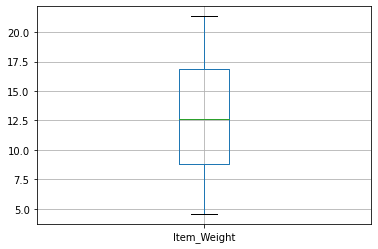

In [ ]:
boxplot = df.boxplot(column=['Item_Weight'])

5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [ ]:
df['Item_Weight']=df.loc[ : ,'Item_Weight'].fillna(method='ffill')

Como no tengo el dato de los pesos faltantes y el rango en el que estos se mueven no es muy amplio decidi poner el valor que le sigue al campo vacío.

In [ ]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size']=df.loc[ : ,'Outlet_Size'].fillna(method='ffill')

In [ ]:
df['Outlet_Size'].value_counts()

Medium    3912
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

Como es difícil evidenciar una tendencia clara, llenar igualmente con el valor siguiente al campo vacio

In [52]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [53]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

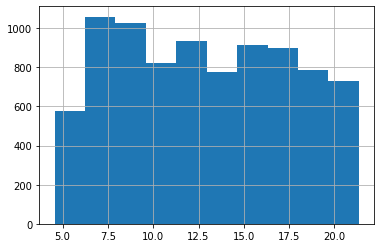

In [54]:
df['Item_Weight'].hist()

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.849649,0.066132,140.992782,1997.831867,2181.288914
std,4.631020,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.750000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


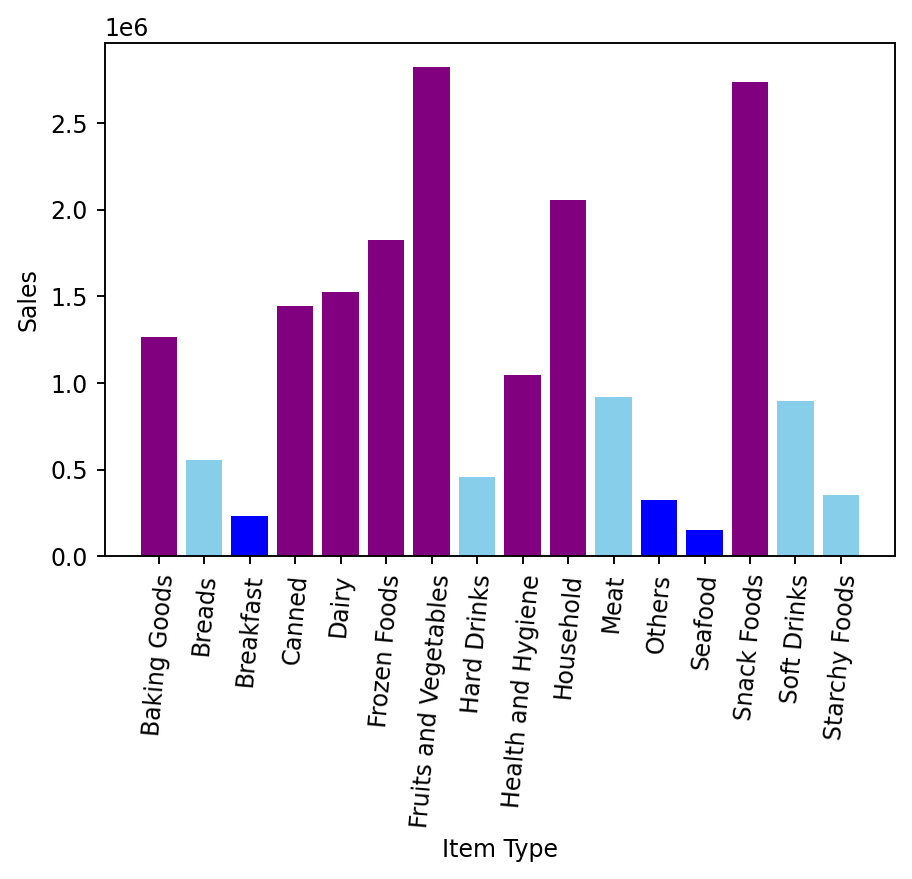

In [ ]:
different_categores = df.groupby("Item_Type")["Item_Outlet_Sales"].sum()  
fig1 = plt.figure(dpi=170)
ax1 = fig1.add_subplot(1,1,1)
bars = ax1.bar(list(different_categores.index),different_categores, align='center', linewidth=0, color='skyblue')
plt.xlabel("Item Type")
plt.xticks(rotation = 85)
plt.ylabel("Sales")

for x in bars:
    bar_1 = bars[10].get_height()
    bar_2 = bars[15].get_height()
    if x.get_height() > bar_1:
        x.set_color('purple')
    elif x.get_height() < bar_2:
        x.set_color("blue")

#ax2 = fig1.add_subplot(1,2,2)
#bars = ax2.bar(list(different_categores.index),different_categores, align='center', linewidth=0, color='orange')
#plt.xlabel("Item Type")
#plt.xticks(rotation = 85)
#plt.ylabel("Sales")


In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


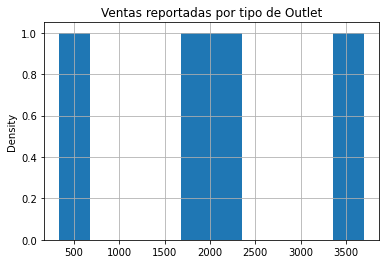

In [50]:
df.groupby("Outlet_Type").Item_Outlet_Sales.mean().hist()
plt.title('Ventas reportadas por tipo de Outlet')
plt.ylabel('Density')
plt.show()

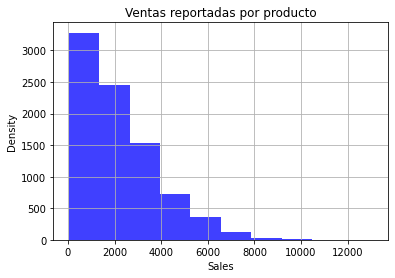

In [ ]:
plt.hist(df.Item_Outlet_Sales,10, facecolor='b',alpha=0.75)
plt.xlabel('Sales')
plt.ylabel('Density')
plt.title('Ventas reportadas por producto')

plt.grid(True)
plt.show()

In [47]:
h=df.groupby("Outlet_Type").Item_Outlet_Sales.mean()
h

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

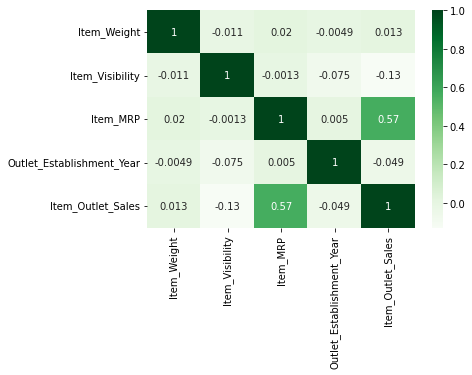

In [51]:
filter_map=df.loc[: ,['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Item_Outlet_Sales']]
corr = filter_map.corr()
df_corr=df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True)
plt.xticks(rotation=90)